# EDA On Penguins Dataset 

## About Dataset 

This Dataset is loaded from seaborn Library . I will Perform full EDA on this Dataset for Practise . 

## Import Libraries

In [76]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn 

### Load Dataset

In [35]:
df = sns.load_dataset("penguins")

### SHow Head Of data

In [36]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [37]:
df.shape

(344, 7)

- Info about the Data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Island_encode             344 non-null    float64
 1   Species_encode            344 non-null    float64
 2   Sex_encode                344 non-null    float64
 3   body_mass_g_scaled        344 non-null    float64
 4   bill_length_mm_scaled     344 non-null    float64
 5   bill_depth_mm_scaled      344 non-null    float64
 6   flipper_length_mm_scaled  344 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


- Statistics 

In [103]:
df.describe()

,Island_encode,Species_encode,Sex_encode,body_mass_g_scaled,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,1.209302,0.918605,0.479651,0.417154,0.429888,0.136488,0.834307
std,0.684970,0.893320,0.500313,0.222115,0.197951,0.091948,0.098485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.236111,0.260909,0.081111,0.780840
50%,1.000000,1.000000,0.000000,0.375000,0.441818,0.136267,0.818258
75%,2.000000,2.000000,1.000000,0.569444,0.596364,0.181689,0.903783
max,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Removing Null Values

In [80]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
Island_encode         0
Species_encode        0
dtype: int64

In [81]:
df["sex"].fillna(df["sex"].mode()[0], inplace=True)

In [82]:
df.isnull().sum()

species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
Island_encode        0
Species_encode       0
dtype: int64

- Imputing Null Values Of bill_length_mm By Mean 

In [83]:
df["bill_length_mm"].fillna(df["bill_length_mm"].mean(), inplace =True)

- Imputing Null Values Of flipper_length_mm By Mean

In [84]:
df["flipper_length_mm"].fillna(df["bill_length_mm"].mean(), inplace =True)


- Imputing Null Values Of bill_depth_mm By Mean

In [85]:
df["bill_depth_mm"].fillna(df["bill_length_mm"].mean(), inplace =True)


- Imputing Null Values Of body_mass_g By Mean

In [86]:
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace =True)


In [87]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
Island_encode        0
Species_encode       0
dtype: int64

- Milestone1 . Here We Imputed All the Null Values 

# Duplicated

- Lets Check Duplicated Values in The Dataset

In [46]:
df.duplicated().any()

False

In [47]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [48]:
df[df["sex"].duplicated()].head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.30000,18.00000,195.00000,3250.000000,Female
3,Adelie,Torgersen,43.92193,43.92193,43.92193,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.00000,3450.000000,Female
5,Adelie,Torgersen,39.30000,20.60000,190.00000,3650.000000,Male
6,Adelie,Torgersen,38.90000,17.80000,181.00000,3625.000000,Female


- Milestone2 = There No Duplicated Value in Dataset . Although There some Duplicated Name,
 but They have Different sex , bodymass , and bill_length_mm

# Outliers

- Lets Find Outliers in Dataset

<Axes: xlabel='sex', ylabel='bill_depth_mm'>

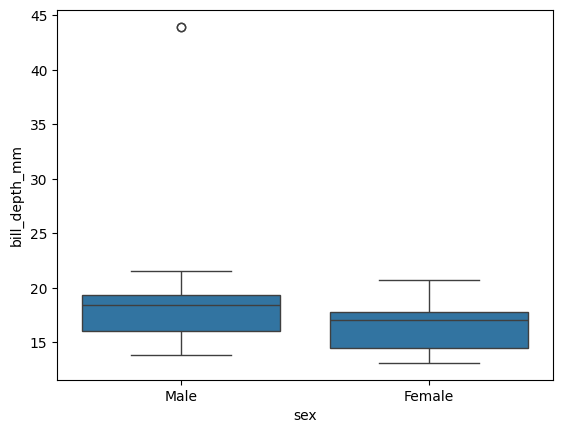

In [49]:
sns.boxplot(data=df , x="sex",y="bill_depth_mm")

- Figure1

In Above Figure 1 we can see that the outlier in Male 

## Removing Outliers Using IQR Method 

- Removinf outliers in bill_depth_mm

In [50]:
Q1_bill = df["bill_depth_mm"].quantile(0.25)
Q3_bill = df["bill_depth_mm"].quantile(0.75)
IQR = Q3_bill-Q1_bill
# print(IQR)
# Define the lower and upper bounds for outliers
lower_bound = Q1_bill - 1.5 * IQR
upper_bound = Q3_bill + 1.5 * IQR

# Identify and print outliers
outliers = [df[(df['bill_depth_mm'] < lower_bound) | (df['bill_depth_mm'] > upper_bound)]]
print("Outliers:")
print(outliers)

# Remove outliers
df = df[(df['bill_depth_mm'] >= lower_bound) & (df['bill_depth_mm'] <= upper_bound)]

# Display the first few rows of the dataset without outliers
print(df.head())

Outliers:
[    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen        43.92193       43.92193           43.92193   
339  Gentoo     Biscoe        43.92193       43.92193           43.92193   

     body_mass_g   sex  
3    4201.754386  Male  
339  4201.754386  Male  ]
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


<Axes: xlabel='sex', ylabel='bill_depth_mm'>

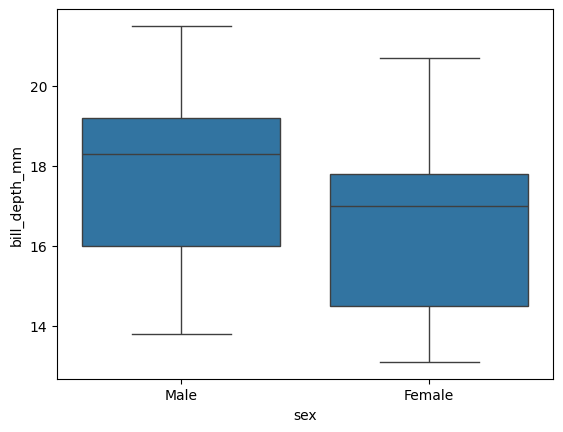

In [51]:
sns.boxplot(data=df , x="sex" , y="bill_depth_mm")

- Figure 2 

- As we can see in Figure 2 , The Outlier is removed 

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

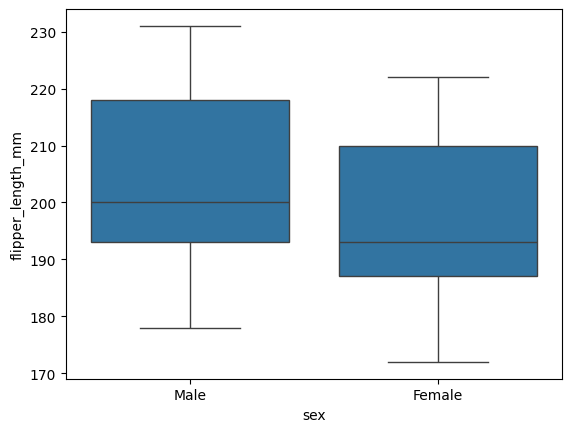

In [52]:
sns.boxplot(data=df , x="sex", y="flipper_length_mm")

- Figure 3 

In [53]:
fig1  = px.box(df , y="bill_depth_mm")
fig1.show()

- Figure 4 

In [54]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

- removing Outlier in bill_length_mm

In [55]:
Q1_body_mass = df["bill_length_mm"].quantile(0.25)
Q3_body_mass = df["bill_length_mm"].quantile(0.75)
IQR = Q3_body_mass-Q1_body_mass
# print(IQR)
# Define the lower and upper bounds for outliers
lower_bound = Q1_body_mass - 1.5 * IQR
upper_bound = Q3_body_mass + 1.5 * IQR

# Identify and print outliers
outliers = [df[(df['bill_length_mm'] < lower_bound) | (df['bill_length_mm'] > upper_bound)]]
# print("Outliers:",outliers)

# Remove outliers
df = df[(df['bill_length_mm'] >= lower_bound) & (df['bill_length_mm'] <= upper_bound)]

# Display the first few rows of the dataset without outliers
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [56]:
fig1  = px.box(df , y="bill_length_mm")
fig1.show()

- Removing Outlier in BodyMass

In [57]:
Q1_mass = df["body_mass_g"].quantile(0.25)
Q3_mass = df["body_mass_g"].quantile(0.75)
IQR_mass = Q3_mass-Q1_mass
# print(IQR)
# Define the lower and upper bounds for outliers
lower_bound = Q1_mass - 1.5 * IQR_mass
upper_bound = Q3_mass + 1.5 * IQR_mass

# Identify and print outliers
outliers = [df[(df['body_mass_g'] < lower_bound) | (df['body_mass_g'] > upper_bound)]]
# print("Outliers:",outliers)

# Remove outliers
df = df[(df['body_mass_g'] >= lower_bound) & (df['body_mass_g'] <= upper_bound)]


In [58]:
fig1  = px.box(df , y="body_mass_g")
fig1.show()

- Milestone 3 =  Here We Remove All The Outliers From Dataset

# 1. Which Species Have Higher Body_Mass

In [59]:
# Which Specie Have High Body Mass
fig = px.box(df , x="species" , y="body_mass_g")
fig.show()

- Here We Can See `Gentoo` Have High Body Mass And `Adelie` Have Lowest Body Mass

## 2. Now Lets See On Hightest And Lowest Body Mass Species is Male Or Female

In [60]:
# Now Lets See On Hightest And Lowest Body Mass Species is Male Or Female
fig = px.box(df , x="species" , y="body_mass_g" , color ="sex")
fig.show()

- From Above Fig We Can Clerly see .. `Adelie` Female Have Lowest Body mass And `Gentoo` Males Have Hightest Bodymass

 # 3 . Which Specie Have Higher and Lower `bill_depth_mm` 

In [61]:
fig1  = px.box(df , x="island", y="bill_depth_mm", color="species")
fig1.show()

- On `Torgersen` Island `Adelie` Specie Have Highest `Bill_depth_mm` and On `Biscoe` Island `Gentoo` Specie Have Lowest `Bill_depth_mm`

In [62]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# 4. Which Island Have High Number of Species 

In [63]:
# Which Island Have High Number of Species 
val_count = df.groupby("island")["species"].value_counts()

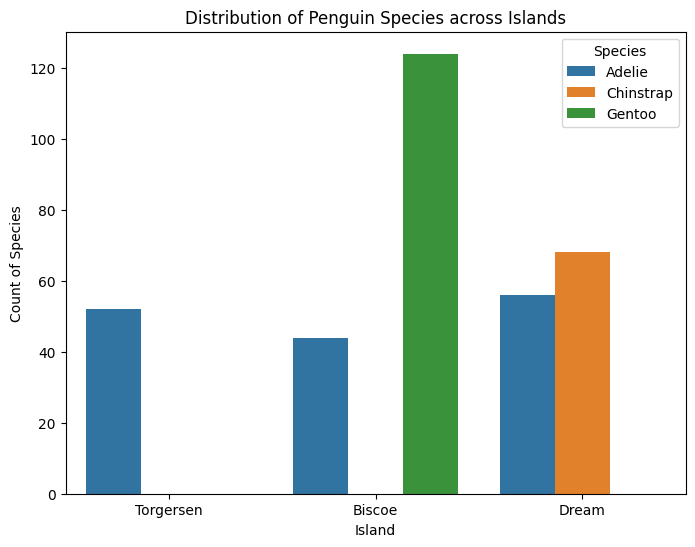

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Create a countplot to show the distribution of penguin species across islands
plt.figure(figsize=(8, 6))
sns.countplot(x='island', data=df, hue='species')
plt.title('Distribution of Penguin Species across Islands')
plt.xlabel('Island')
plt.ylabel('Count of Species')
plt.legend(title='Species', loc='upper right')
plt.show()


From Above Fig  we Can See That `Biscoe` Island Have Higher Number Of `Gentoo` Specie

In [65]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 5 . Island Wise Top 5 Species Having High Bill_length_mm 

In [66]:
df.groupby(["island","species"])["bill_length_mm"].sum().sort_values(ascending=False)
df.groupby(["island","species"])["bill_length_mm"].sum().sort_values(ascending=False).head(10)

island     species  
Biscoe     Gentoo       5843.1
Dream      Chinstrap    3320.7
           Adelie       2156.1
Torgersen  Adelie       1986.5
Biscoe     Adelie       1714.9
Name: bill_length_mm, dtype: float64

<Axes: ylabel='island,species'>

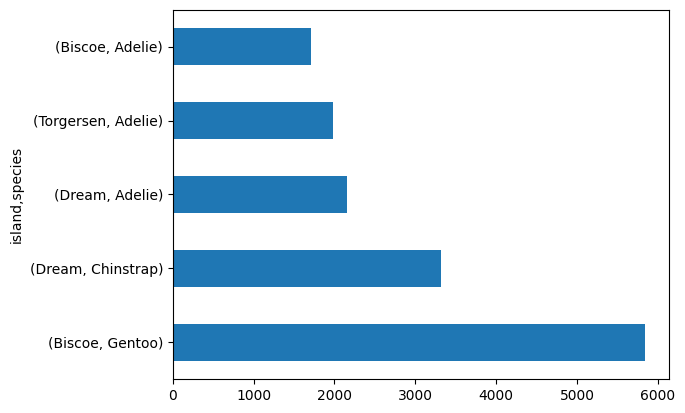

In [67]:
df.groupby(["island","species"])["bill_length_mm"].sum().sort_values(ascending=False).head(10).plot(kind="barh")


# 6 . Island Wise Top 5 Species Having High flipper_length_mm 

<Axes: ylabel='island,species'>

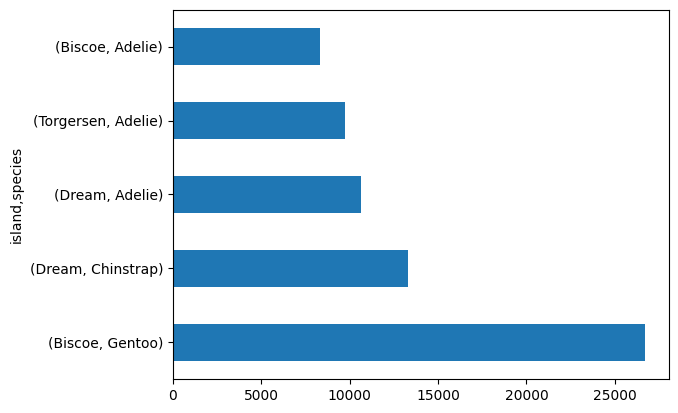

In [68]:
df.groupby(["island","species"])["flipper_length_mm"].sum().sort_values(ascending=False).head(10)
df.groupby(["island","species"])["flipper_length_mm"].sum().sort_values(ascending=False).head(10).plot(kind="barh")

# 7 . Island Wise Top 5 Sex Having High flipper_length_mm 

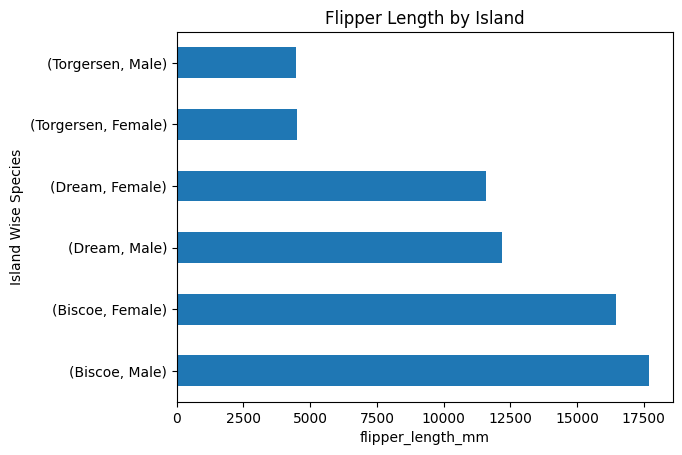

In [69]:
df.groupby(["island","sex"])["flipper_length_mm"].sum().sort_values(ascending=False).head(10)
df.groupby(["island","sex"])["flipper_length_mm"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.xlabel("flipper_length_mm")
plt.ylabel("Island Wise Species")
plt.title("Flipper Length by Island")
plt.show()


In [70]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# 8 . Island Wise Top 5 Species Having High Body_Mass 

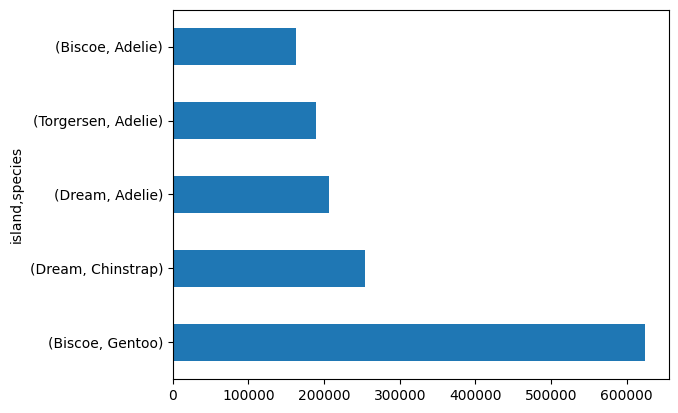

In [71]:
# Island Wise Species Bodymass
df.groupby(["island","species"])["body_mass_g"].sum().sort_values(ascending=False).head(10)
df.groupby(["island","species"])["body_mass_g"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.show()

# Steps To Ready Data For Machine Learning


# Encode Data 

In [72]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

- Encode Island 

In [73]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Torgersen', 'Biscoe', 'Dream']])

df["Island_encode"] = encoder.fit_transform(df[["island"]])


- Encode Species

In [74]:

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Adelie', 'Chinstrap', 'Gentoo']])

df["Species_encode"] = encoder.fit_transform(df[["species"]])



- Encode Sex

In [78]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Island_encode,Species_encode
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0.0


In [89]:

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Male', 'Female']])

df["Sex_encode"] = encoder.fit_transform(df[["sex"]])



In [90]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Island_encode,Species_encode,Sex_encode
0,Adelie,Torgersen,39.10000,18.70000,181.00000,3750.000000,Male,0.0,0.0,0.0
1,Adelie,Torgersen,39.50000,17.40000,186.00000,3800.000000,Female,0.0,0.0,1.0
2,Adelie,Torgersen,40.30000,18.00000,195.00000,3250.000000,Female,0.0,0.0,1.0
3,Adelie,Torgersen,43.92193,43.92193,43.92193,4201.754386,Male,0.0,0.0,0.0
4,Adelie,Torgersen,36.70000,19.30000,193.00000,3450.000000,Female,0.0,0.0,1.0


- Lets Remove Categorical Columns

In [91]:
df.drop(columns="species" , inplace=True)
df.drop(columns="sex" , inplace=True)
df.drop(columns="island" , inplace=True)


 Here All The Categorical Columns ARe Encoded For Machine Learning

# Scale Data Using Min-Max Scaling 

- Scale Body_mass Column

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df["body_mass_g_scaled"] = scaler.fit_transform(df[["body_mass_g"]])

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_encode,Species_encode,Sex_encode,body_mass_g_scaled
0,39.10000,18.70000,181.00000,3750.000000,0.0,0.0,0.0,0.291667
1,39.50000,17.40000,186.00000,3800.000000,0.0,0.0,1.0,0.305556
2,40.30000,18.00000,195.00000,3250.000000,0.0,0.0,1.0,0.152778
3,43.92193,43.92193,43.92193,4201.754386,0.0,0.0,0.0,0.417154
4,36.70000,19.30000,193.00000,3450.000000,0.0,0.0,1.0,0.208333


- Scale bill_length 

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df["bill_length_mm_scaled"] = scaler.fit_transform(df[["bill_length_mm"]])

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_encode,Species_encode,Sex_encode,body_mass_g_scaled,bill_length_mm_scaled
0,39.10000,18.70000,181.00000,3750.000000,0.0,0.0,0.0,0.291667,0.254545
1,39.50000,17.40000,186.00000,3800.000000,0.0,0.0,1.0,0.305556,0.269091
2,40.30000,18.00000,195.00000,3250.000000,0.0,0.0,1.0,0.152778,0.298182
3,43.92193,43.92193,43.92193,4201.754386,0.0,0.0,0.0,0.417154,0.429888
4,36.70000,19.30000,193.00000,3450.000000,0.0,0.0,1.0,0.208333,0.167273


- Sclae bill_depth

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df["bill_depth_mm_scaled"] = scaler.fit_transform(df[["bill_depth_mm"]])

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_encode,Species_encode,Sex_encode,body_mass_g_scaled,bill_length_mm_scaled,bill_depth_mm_scaled
0,39.10000,18.70000,181.00000,3750.000000,0.0,0.0,0.0,0.291667,0.254545,0.181689
1,39.50000,17.40000,186.00000,3800.000000,0.0,0.0,1.0,0.305556,0.269091,0.139511
2,40.30000,18.00000,195.00000,3250.000000,0.0,0.0,1.0,0.152778,0.298182,0.158978
3,43.92193,43.92193,43.92193,4201.754386,0.0,0.0,0.0,0.417154,0.429888,1.000000
4,36.70000,19.30000,193.00000,3450.000000,0.0,0.0,1.0,0.208333,0.167273,0.201155


- Scale flipper_length

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df["flipper_length_mm_scaled"] = scaler.fit_transform(df[["flipper_length_mm"]])

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_encode,Species_encode,Sex_encode,body_mass_g_scaled,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled
0,39.10000,18.70000,181.00000,3750.000000,0.0,0.0,0.0,0.291667,0.254545,0.181689,0.732732
1,39.50000,17.40000,186.00000,3800.000000,0.0,0.0,1.0,0.305556,0.269091,0.139511,0.759459
2,40.30000,18.00000,195.00000,3250.000000,0.0,0.0,1.0,0.152778,0.298182,0.158978,0.807567
3,43.92193,43.92193,43.92193,4201.754386,0.0,0.0,0.0,0.417154,0.429888,1.000000,0.000000
4,36.70000,19.30000,193.00000,3450.000000,0.0,0.0,1.0,0.208333,0.167273,0.201155,0.796876


- Remove Simple Colums ..

In [96]:
df.drop(columns="bill_length_mm" , inplace=True)
df.drop(columns="flipper_length_mm" , inplace=True)
df.drop(columns="bill_depth_mm" , inplace=True)
df.drop(columns="body_mass_g" , inplace=True)

- Here Our Data is Ready For Machine Learning 

In [97]:
px.box(df , x="Sex_encode" , y="body_mass_g_scaled")

In [98]:
px.box(df , x="Sex_encode" , y="bill_length_mm_scaled")

In [99]:
px.box(df , x="Species_encode" , y="bill_length_mm_scaled")

In [100]:
df.columns

Index(['Island_encode', 'Species_encode', 'Sex_encode', 'body_mass_g_scaled',
       'bill_length_mm_scaled', 'bill_depth_mm_scaled',
       'flipper_length_mm_scaled'],
      dtype='object')

In [101]:
px.scatter(df , x="bill_length_mm_scaled" , y="bill_depth_mm_scaled" , color="Sex_encode")